In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('src/')

import loading

In [26]:
df = loading.load_data()

mutations_d77_localized.csv
mutations_d94_localized.csv
mutations_d93_localized.csv
.DS_Store
mutations_d78_localized.csv
mutations_d92_localized.csv
mutations_d75_localized.csv
mutations_d95_localized.csv
mutations_d91_localized.csv


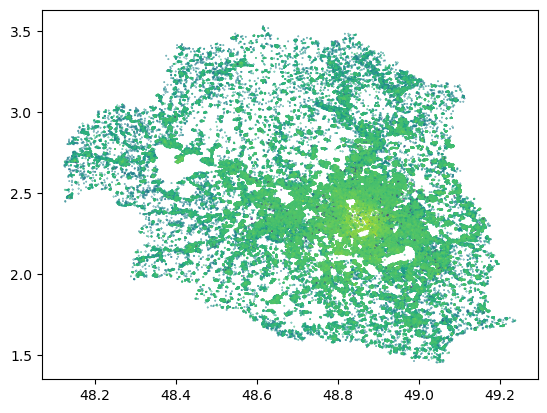

In [37]:
plt.scatter(df['latitude'],df['longitude'], c = np.log(df['valeurfonc']/df['sterr']), s = 0.1)
plt.show()

In [39]:
pd.set_option('display.max_columns',100)
df.head()

,idmutation,idmutinvar,idopendata,idnatmut,codservch,refdoc,datemut,anneemut,moismut,coddep,libnatmut,vefa,valeurfonc,nbdispo,nblot,nbcomm,l_codinsee,nbsection,l_section,nbpar,l_idpar,nbparmut,l_idparmut,nbsuf,sterr,nbvolmut,nblocmut,l_idlocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien,latitude,longitude
0,6580136.0,8479f2c05641e71bc1cf950fb934a994,8479f2c05641e71bc1cf950fb934a994,1.0,NaN,NaN,2018-12-21,2018.0,12.0,77.0,Vente,False,850440.00,4.0,0.0,1.0,['77492'],3.0,"['0C', '0E', '0V']",24.0,"['774920000C0103', '774920000C0110', '77492000...",24.0,"['774920000C0103', '774920000C0110', '77492000...",31.0,373405.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2313.0,TERRAIN DE TYPE TERRE ET PRE,48.882998,3.369293
1,6588683.0,045c750484ff921e5b3bedd9833c7a42,045c750484ff921e5b3bedd9833c7a42,1.0,NaN,NaN,2018-10-30,2018.0,10.0,77.0,Vente,False,21491.45,1.0,0.0,1.0,['77187'],6.0,"['0A', '0F', '0G', '0H', '0U', 'ZL']",83.0,"['771870000A0044', '771870000A0512', '77187000...",83.0,"['771870000A0044', '771870000A0512', '77187000...",84.0,101885.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,TERRAIN FORESTIER,48.412602,3.406395
2,6592269.0,206e40bacc4b3edb7f043e93015a1e5e,206e40bacc4b3edb7f043e93015a1e5e,2.0,NaN,NaN,2018-11-06,2018.0,11.0,77.0,Vente en l'état futur d'achèvement,True,239000.00,1.0,2.0,1.0,['77058'],1.0,['AM'],1.0,['77058000AM0069'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.832114,2.710080
3,6302687.0,edf4d64bcc5f38059024548910286b7c,edf4d64bcc5f38059024548910286b7c,1.0,NaN,NaN,2020-05-15,2020.0,5.0,77.0,Vente,False,48000.00,1.0,1.0,1.0,['77191'],1.0,['AB'],1.0,['77191000AB0452'],0.0,None,0.0,0.0,0.0,1.0,['771910007684629_0'],0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,18.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,UN APPARTEMENT,48.556094,2.953974
4,7010109.0,4103e1a52b70cdbe75dc5c895e084c7a,4103e1a52b70cdbe75dc5c895e084c7a,2.0,NaN,NaN,2015-09-25,2015.0,9.0,77.0,Vente en l'état futur d'achèvement,True,207000.00,1.0,3.0,1.0,['77053'],1.0,['AW'],1.0,['77053000AW0459'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.685247,2.600626


In [88]:
df[df['nblot']==0]

,idmutation,idmutinvar,idopendata,idnatmut,codservch,refdoc,datemut,anneemut,moismut,coddep,libnatmut,vefa,valeurfonc,nbdispo,nblot,nbcomm,l_codinsee,nbsection,l_section,nbpar,l_idpar,nbparmut,l_idparmut,nbsuf,sterr,nbvolmut,nblocmut,l_idlocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien,latitude,longitude
0,6580136.0,8479f2c05641e71bc1cf950fb934a994,8479f2c05641e71bc1cf950fb934a994,1.0,NaN,NaN,2018-12-21,2018.0,12.0,77.0,Vente,False,850440.00,4.0,0.0,1.0,['77492'],3.0,"['0C', '0E', '0V']",24.0,"['774920000C0103', '774920000C0110', '77492000...",24.0,"['774920000C0103', '774920000C0110', '77492000...",31.0,373405.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2313.0,TERRAIN DE TYPE TERRE ET PRE,48.882998,3.369293
1,6588683.0,045c750484ff921e5b3bedd9833c7a42,045c750484ff921e5b3bedd9833c7a42,1.0,NaN,NaN,2018-10-30,2018.0,10.0,77.0,Vente,False,21491.45,1.0,0.0,1.0,['77187'],6.0,"['0A', '0F', '0G', '0H', '0U', 'ZL']",83.0,"['771870000A0044', '771870000A0512', '77187000...",83.0,"['771870000A0044', '771870000A0512', '77187000...",84.0,101885.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,TERRAIN FORESTIER,48.412602,3.406395
12,6594515.0,e81c31bd3a6208bd2eda6247fed0cf55,e81c31bd3a6208bd2eda6247fed0cf55,1.0,NaN,NaN,2018-12-21,2018.0,12.0,77.0,Vente,False,19587424.00,1.0,0.0,1.0,['77083'],1.0,['AM'],1.0,['77083000AM0359'],0.0,None,0.0,0.0,1.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,BATI - INDETERMINE : Vente avec volume(s),48.840095,2.593023
16,7014626.0,1c17fabb97a9c5a8f0a2a45857346faf,1c17fabb97a9c5a8f0a2a45857346faf,1.0,NaN,NaN,2015-06-05,2015.0,6.0,77.0,Vente,False,128000.00,1.0,0.0,1.0,['77186'],1.0,['AO'],1.0,['77186000AO0157'],0.0,None,0.0,0.0,1.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,BATI - INDETERMINE : Vente avec volume(s),48.403910,2.698205
48,6862875.0,fe02d21be6a6581f89553eeaa2ca01b7,fe02d21be6a6581f89553eeaa2ca01b7,1.0,NaN,NaN,2016-02-23,2016.0,2.0,77.0,Vente,False,210000.00,1.0,0.0,4.0,"['77242', '77260', '77446', '77456']",10.0,"['0A', '0C', '0D', '0Y', 'AD', 'AE', 'XA', 'ZA...",53.0,"['772420000A0033', '772420000A0329', '77242000...",53.0,"['772420000A0033', '772420000A0329', '77242000...",63.0,339311.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2313.0,TERRAIN DE TYPE TERRE ET PRE,48.490975,3.214878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133816,8131245.0,db4b98f38666a79061105fafa26980c4,db4b98f38666a79061105fafa26980c4,1.0,NaN,NaN,2018-07-27,2018.0,7.0,91.0,Vente,False,369000.00,1.0,0.0,1.0,['91191'],1.0,['AE'],1.0,['91191000AE0476'],1.0,['91191000AE0476'],1.0,417.0,0.0,1.0,['911910010123129_0'],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,111.0,UNE MAISON,48.718649,2.471684
133817,7955384.0,5f4631eb1d398a418549b2e3f1c36746,5f4631eb1d398a418549b2e3f1c36746,1.0,NaN,NaN,2020-10-21,2020.0,10.0,91.0,Vente,False,365000.00,1.0,0.0,1.0,['91471'],1.0,['AM'],1.0,['91471000AM0029'],1.0,['91471000AM0029'],1.0,233.0,0.0,1.0,['914710009907113_0'],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,111.0,UNE MAISON,48.700850,2.203866
133818,8385565.0,caa06993f36690a13c039e3b

In [68]:
col = [#'idmutation', identifiant
       #'idmutinvar', identifiant
       #'idopendata', identifiant
       #'idnatmut', identifiant
       #'codservch', always missing
       #'refdoc',  always missing
       #'datemut',  only keep year and month
       'anneemut', # Year
       'moismut', # Month
       'coddep', # Departement
       'libnatmut', # Type (6 possibilities) --> Maybe select some. 
       #'vefa', already store in libnatmut
       'valeurfonc', # Value --> Target
       #'nbdispo', 
       'nblot', # Number of lot, 390k of data = 0, weird
       'nbcomm',  # --> Filter for nbcomm == 1
       'l_codinsee', # Keep for merging with other data --> List of insee code
       # 'nbsection', we don't know what it is
       # 'l_section', we don't know what it is
       # 'nbpar', we don't know what it is
       # 'l_idpar', we don't know what it is
       # 'nbparmut', we don't know what it is
       # 'l_idparmut', we don't know what it is
       # 'nbsuf',  we don't know what it is
       'sterr', # 
       # 'nbvolmut', we don't know what it is
       # 'nblocmut', we don't know what it is
       'l_idlocmut', 
       'nblocmai',
       'nblocapt', 
       'nblocdep', 
       'nblocact', 
       'nbapt1pp', 
       'nbapt2pp', 
       'nbapt3pp',
       'nbapt4pp', 
       'nbapt5pp', 
       'nbmai1pp', 
       'nbmai2pp', 
       'nbmai3pp', 
       'nbmai4pp',
       'nbmai5pp', 
       'sbati', 
       'sbatmai', 
       'sbatapt', 
       'sbatact', 
       'sapt1pp',
       'sapt2pp', 
       'sapt3pp', 
       'sapt4pp', 
       'sapt5pp', 
       'smai1pp', 
       'smai2pp',
       'smai3pp', 
       'smai4pp', 
       'smai5pp', 
       'codtypbien', 
       'libtypbien', 
       'latitude', # To plot the map
       'longitude'] # To plot the map

In [98]:
df['libnatmut'].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [101]:
df[df.libnatmut == "Vente en l'état futur d'achèvement"]

,idmutation,idmutinvar,idopendata,idnatmut,codservch,refdoc,datemut,anneemut,moismut,coddep,libnatmut,vefa,valeurfonc,nbdispo,nblot,nbcomm,l_codinsee,nbsection,l_section,nbpar,l_idpar,nbparmut,l_idparmut,nbsuf,sterr,nbvolmut,nblocmut,l_idlocmut,nblocmai,nblocapt,nblocdep,nblocact,nbapt1pp,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,sbati,sbatmai,sbatapt,sbatact,sapt1pp,sapt2pp,sapt3pp,sapt4pp,sapt5pp,smai1pp,smai2pp,smai3pp,smai4pp,smai5pp,codtypbien,libtypbien,latitude,longitude
2,6592269.0,206e40bacc4b3edb7f043e93015a1e5e,206e40bacc4b3edb7f043e93015a1e5e,2.0,NaN,NaN,2018-11-06,2018.0,11.0,77.0,Vente en l'état futur d'achèvement,True,239000.0,1.0,2.0,1.0,['77058'],1.0,['AM'],1.0,['77058000AM0069'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.832114,2.710080
4,7010109.0,4103e1a52b70cdbe75dc5c895e084c7a,4103e1a52b70cdbe75dc5c895e084c7a,2.0,NaN,NaN,2015-09-25,2015.0,9.0,77.0,Vente en l'état futur d'achèvement,True,207000.0,1.0,3.0,1.0,['77053'],1.0,['AW'],1.0,['77053000AW0459'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.685247,2.600626
5,6738630.0,5b76857beac83937e78081be3914f51f,5b76857beac83937e78081be3914f51f,2.0,NaN,NaN,2017-03-16,2017.0,3.0,77.0,Vente en l'état futur d'achèvement,True,188000.0,1.0,2.0,1.0,['77449'],1.0,['0A'],1.0,['774490000A0320'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.853383,2.788393
6,6426845.0,8f99f665c1079ebd7f87adc441ef1e78,8f99f665c1079ebd7f87adc441ef1e78,2.0,NaN,NaN,2019-03-08,2019.0,3.0,77.0,Vente en l'état futur d'achèvement,True,244000.0,1.0,2.0,1.0,['77307'],1.0,['0C'],1.0,['773070000C0700'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.865646,2.759177
8,6455780.0,46446fecabe302e8e48c7cf60291c180,46446fecabe302e8e48c7cf60291c180,2.0,NaN,NaN,2019-04-26,2019.0,4.0,77.0,Vente en l'état futur d'achèvement,True,203500.0,1.0,2.0,1.0,['77468'],1.0,['AN'],1.0,['77468000AN0155'],0.0,None,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,BATI - INDETERMINE : Vefa sans descriptif,48.839703,2.650054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133773,8037124.0,d964afe3d2172db5967a83f930790026,d964afe3d2172db5967a83f930790026,2.0,NaN,NaN,2019-06-07,2019.0,6.0,91.0,Vente en l'état futur d'achèvement,True,334992.0,1.0,3.0,1.0,['91689'],1.0,['AB'],1.0,['91689000AB0732'],0.0,None,0.0,0.0,0.0,1.0,['916890009993128_0'],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,ACTIVITE,48.728478,2.326222
133783,8127262.0,94be7931712fddb990f4a109bc52a9a4,94be7931712fddb990f4a109bc52a9a4,2.0,NaN,NaN,2018-11-14,2018.0,11.0,91.0,Vente en l'état futur d'achèvement,True,148000.0,1.0,2.0,1.0,['91047'],1.0,['AM'],1.0,['91047000AM0351'],0.0,None,0.0,0.0,0.0,2.0,"['910470010146418_0', '910470010146419_0']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,42.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,UN APPARTEMENT,48.487806,2.351496
133785,8305185.0,e37fbbcc51d48620c96ec8223248f18c,e37fbbcc51d48620c96ec8223248f18c,2.0,NaN,NaN,2016-01-27,2016.0,1.0,91.0,Vente en l'état futur d'achèvement,True,179000.0,1.0,2.0,1.0,['91573'],1.0,['ZD'

In [89]:
len(df)

1271568

In [66]:
quant_features = []
cat_features = []